# 🇮🇹 Liste di attesa sanitarie in Puglia (2024)  
## Monitoraggio ufficiale dell’accesso alle prestazioni del SSN regionale

Questo notebook presenta un’analisi esplorativa dei dati ufficiali di monitoraggio delle **liste di attesa sanitarie della Regione Puglia** per l’anno **2024**.

Il dataset utilizza dati amministrativi aggregati pubblicati dalla Regione Puglia e riorganizzati in una struttura longitudinale standardizzata, progettata per consentire analisi comparabili dell’accessibilità ai servizi sanitari tra:

- Aziende Sanitarie Locali (ASL)  
- prestazioni sanitarie  
- classi di priorità (B, D, P)  
- finestre di monitoraggio settimanali e trimestrali  

L’obiettivo del notebook è fornire una lettura **trasparente, riproducibile e comparabile** delle principali criticità strutturali nell’erogazione delle prestazioni sanitarie pubbliche in Puglia.

## Metodologia

Le percentuali di rispetto dei tempi per le prestazioni di classe D sono sintetizzate mediante medie pesate sui volumi delle prestazioni monitorate, così da rappresentare l’esperienza reale dei cittadini e non la semplice media delle singole osservazioni.
Le elaborazioni sono condotte esclusivamente su osservazioni con volumi disponibili e percentuali valide.

---

## Origine dei dati

Il file **`liste_attesa_sanit_puglia_2024.csv`** contiene dati amministrativi ufficiali di monitoraggio delle liste di attesa pubblicati dalla Regione Puglia attraverso il proprio portale Open Data.

I dati descrivono, in forma aggregata, i volumi di prestazioni:

- richieste  
- monitorate  
- classificate per priorità  
- erogate entro i tempi massimi previsti dalla normativa  

---

## Normalizzazione delle prestazioni

Le denominazioni delle prestazioni sanitarie nella fonte originale non sono uniformi e variano tra strutture e periodi.

Per rendere possibile un’analisi comparabile, è stato costruito un **sistema di normalizzazione rule-based**, definito nel file:

**`dizionario.csv`**

Questo file contiene le regole di classificazione che mappano le denominazioni eterogenee delle prestazioni verso **categorie standardizzate** (`prestazione_normalizzata`) e **macro-categorie** (`categoria`).

Tale normalizzazione consente confronti coerenti tra ASL, servizi e periodi.

---

## Costruzione degli indicatori

Il dataset include indicatori strutturali derivati progettati per misurare la performance del sistema sanitario regionale in termini di rispetto dei tempi di attesa:

• **Timeliness B/D/P** = prestazioni entro tempo massimo / prestazioni monitorate per classe  
• **Volumi fuori monitoraggio** = prestazioni totali − prestazioni monitorate  
• **Volumi non classificati** = prestazioni monitorate − (B + D + P)  

Tutti gli indicatori sono espressi come conteggi o percentuali e consentono confronti diretti tra ASL, prestazioni e finestre temporali.

---

## Nota sui valori mancanti

Alcune colonne possono contenere valori `NaN`.

I `NaN` **non rappresentano valore zero**, ma indicano che il dato non è disponibile, non pubblicato o non applicabile per quella specifica combinazione di ASL, prestazione e periodo.

La presenza di `NaN` è fisiologica nei dati amministrativi aggregati e può comportare:

- distorsioni apparenti nei grafici,
- medie non calcolabili per alcuni gruppi,
- variazioni improvvise dovute alla mancanza di osservazioni.

Tali effetti **non costituiscono errori nei dati**, ma riflettono i limiti informativi della fonte ufficiale.

---

Questo notebook utilizzerà tali dati per identificare **servizi critici**, **differenze strutturali tra ASL** e pattern temporali nel rispetto dei tempi di attesa.

In [1]:
# Questo ambiente Python è fornito da Kaggle e contiene già le principali librerie
# per l'analisi dei dati (pandas, numpy, matplotlib, ecc.).
import pandas as pd
import matplotlib.pyplot as plt
import os

# Importiamo la funzione display per visualizzare le tabelle in formato tabellare pulito nel notebook
from IPython.display import display

# Disabilita i warning di formattazione numerica generati automaticamente da pandas
# per mantenere l’output pulito e focalizzato sui contenuti del dataset.
import warnings
warnings.filterwarnings("ignore")

# Visualizziamo tutti i file disponibili nella cartella di input del notebook.
# Questo permette a chi legge di capire quali dataset sono caricati nel progetto.
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/italy-puglia-healthcare-waiting-lists-audit-2024/dizionario.csv
/kaggle/input/italy-puglia-healthcare-waiting-lists-audit-2024/liste_attesa_sanit_puglia_2024.csv


In [2]:
# Caricamento del foglio
df = pd.read_csv('/kaggle/input/italy-puglia-healthcare-waiting-lists-audit-2024/liste_attesa_sanit_puglia_2024.csv')

In [3]:
# Visualizzazione foglio liste
display(df.head())
df.info()

,asl,periodo,prestazione_originale,prestazione_normalizzata,categoria,erogazioni_totali,erogazioni_monitorate,volumi_B,attesa_totale_B,volumi_D,attesa_totale_D,volumi_P,attesa_totale_P,volumi_fuori_monitoraggio,volumi_non_classificati,percentuale_raggiunta_B,percentuale_raggiunta_D,percentuale_raggiunta_P
0,160114,I Trimestre 2024,Prima Visita cardiologica,VISITA_CARDIOLOGICA,VISITA,8915.0,2862.0,1359.0,660.0,1193.0,620.0,277.0,277.0,6053.0,33.0,48.57,51.97,100.00
1,160114,I Trimestre 2024,Prima Visita chirurgia vascolare,VISITA_CHIRURGIA_VASCOLARE,VISITA,1655.0,493.0,263.0,110.0,230.0,117.0,NaN,NaN,1162.0,0.0,41.83,50.87,NaN
2,160114,I Trimestre 2024,Prima Visita endocrinologica,VISITA_ENDOCRINOLOGICA,VISITA,5849.0,1589.0,825.0,361.0,760.0,376.0,3.0,2.0,4260.0,1.0,43.76,49.47,66.67
3,160114,I Trimestre 2024,Prima Visita neurologica,VISITA_NEUROLOGICA,VISITA,6394.0,1958.0,1035.0,490.0,820.0,446.0,102.0,102.0,4436.0,1.0,47.34,54.39,100.00
4,160114,I Trimestre 2024,Prima Visita oculistica,VISITA_OCULISTICA,VISITA,10431.0,3405.0,1035.0,608.0,1559.0,1010.0,755.0,747.0,7026.0,56.0,58.74,64.79,98.94


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   asl                        1656 non-null   int64  
 1   periodo                    1656 non-null   object 
 2   prestazione_originale      1656 non-null   object 
 3   prestazione_normalizzata   1656 non-null   object 
 4   categoria                  1656 non-null   object 
 5   erogazioni_totali          1420 non-null   float64
 6   erogazioni_monitorate      1401 non-null   float64
 7   volumi_B                   1313 non-null   float64
 8   attesa_totale_B            1244 non-null   float64
 9   volumi_D                   1268 non-null   float64
 10  attesa_totale_D            1236 non-null   float64
 11  volumi_P                   1205 non-null   float64
 12  attesa_totale_P            1176 non-null   float64
 13  volumi_fuori_monitoraggio  869 non-null    float

In [4]:
# Definiamo l'ordine cronologico reale dei periodi di monitoraggio
period_order = [
    'I Trimestre 2024',
    'II Trimestre 2024',
    '01-05 Luglio 2024',
    '07-11 Ottobre 2024'
]

# Convertiamo la colonna 'periodo' in una categoria ordinata
df['periodo'] = pd.Categorical(
    df['periodo'],
    categories=period_order,
    ordered=True
)

In [5]:
# Verifica copertura del dataset
# Numero totale di osservazioni (ASL–prestazione–periodo)
print("Righe totali:", len(df))

# Righe con volumi D pari a zero (prestazioni non monitorate o non erogate)
print("Volumi D = 0:", (df['volumi_D'] == 0).sum())

# Righe con percentuale mancante
print("Percentuale D NaN:", df['percentuale_raggiunta_D'].isna().sum())

# Righe non utilizzabili per il calcolo delle performance
print(
    "Righe fuori monitoraggio:",
    ((df['volumi_D'] == 0) | (df['percentuale_raggiunta_D'].isna())).sum()
)

Righe totali: 1656
Volumi D = 0: 0
Percentuale D NaN: 958
Righe fuori monitoraggio: 958


## Quali ASL rispettano meno i tempi di attesa?

Questo grafico mostra la **percentuale media di prestazioni erogate entro i tempi massimi per la classe di priorità D**
per ciascuna ASL nel 2024.

La classe D rappresenta le prestazioni differibili ma clinicamente rilevanti ed è il miglior indicatore sintetico della performance strutturale delle liste di attesa.

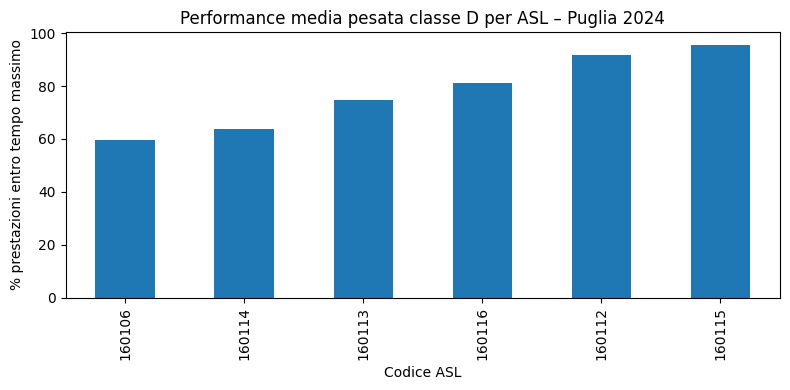

In [6]:
# Selezione delle osservazioni utilizzabili per il calcolo delle performance
# (volumi presenti e percentuali disponibili)
df_D = df[(df['volumi_D'] > 0) & (df['percentuale_raggiunta_D'].notna())]

# Calcolo della performance media pesata per ASL (classe D)
asl_perf = (
    df_D.groupby('asl')
        .apply(lambda x: (x['percentuale_raggiunta_D'] * x['volumi_D']).sum() / x['volumi_D'].sum())
        .sort_values()
)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
asl_perf.plot(kind='bar')
plt.ylabel('% prestazioni entro tempo massimo')
plt.title('Performance media pesata classe D per ASL – Puglia 2024')
plt.xlabel('Codice ASL')
plt.tight_layout()
plt.show()

## Quali prestazioni hanno le peggiori liste di attesa?

Questo grafico individua le **10 prestazioni sanitarie con la percentuale più bassa di rispetto dei tempi (classe D)**.
Queste prestazioni rappresentano i principali colli di bottiglia strutturali del sistema sanitario regionale.

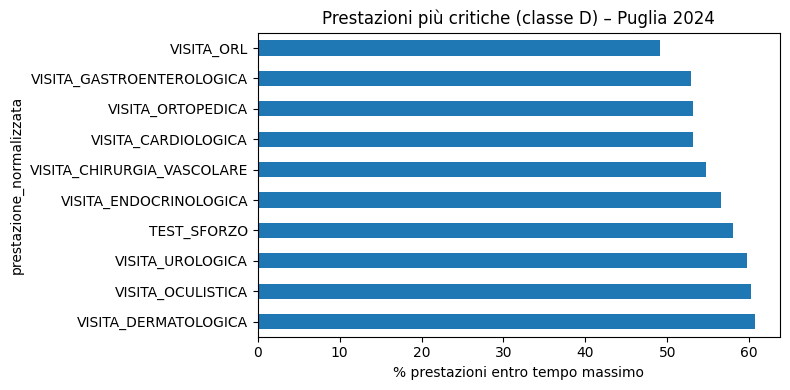

In [7]:
# Selezione delle osservazioni utilizzabili (volumi presenti e percentuali disponibili)
df_D = df[(df['volumi_D'] > 0) & (df['percentuale_raggiunta_D'].notna())]

# Calcolo della performance media pesata per prestazione (classe D)
critical_services = (
    df_D.groupby('prestazione_normalizzata')
        .apply(lambda x: (x['percentuale_raggiunta_D'] * x['volumi_D']).sum() / x['volumi_D'].sum())
        .sort_values()
        .head(10)
)

plt.figure(figsize=(8,4))
critical_services.plot(kind='barh')
plt.xlabel('% prestazioni entro tempo massimo')
plt.title('Prestazioni più critiche (classe D) – Puglia 2024')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Andamento nel tempo delle liste di attesa

Questo grafico mostra l’**andamento medio regionale della percentuale di rispetto dei tempi (classe D)** nel corso del 2024.
Permette di individuare eventuali segnali di miglioramento o peggioramento strutturale.

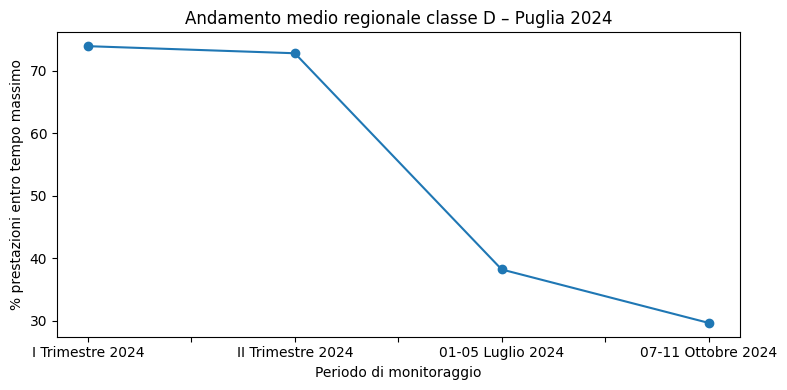

In [8]:
# Selezione delle osservazioni utilizzabili (volumi presenti e percentuali disponibili)
df_D = df[(df['volumi_D'] > 0) & (df['percentuale_raggiunta_D'].notna())]

# Calcolo della performance media regionale pesata per periodo (classe D)
trend = (
    df_D.groupby('periodo')
        .apply(lambda x: (x['percentuale_raggiunta_D'] * x['volumi_D']).sum() / x['volumi_D'].sum())
        .sort_index()
)

plt.figure(figsize=(8,4))
trend.plot(marker='o')
plt.ylabel('% prestazioni entro tempo massimo')
plt.title('Andamento medio regionale classe D – Puglia 2024')
plt.xlabel('Periodo di monitoraggio')
plt.tight_layout()
plt.show()

## Quanta attività non è inclusa nel monitoraggio ufficiale?

Questo grafico mostra la **percentuale di prestazioni fuori dal perimetro di monitoraggio ufficiale** per ciascuna ASL.
Valori elevati indicano possibili aree cieche informative del sistema.

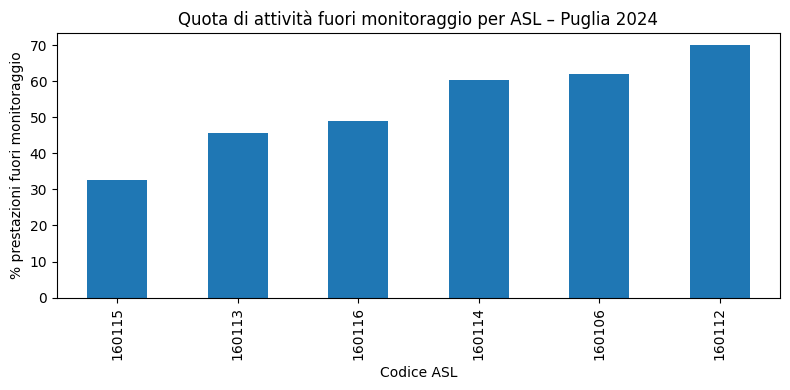

In [9]:
# Quota di prestazioni non incluse nel perimetro di monitoraggio ufficiale per ASL
monitor_gap = (
    df.groupby('asl')
      .apply(lambda x: x['volumi_fuori_monitoraggio'].sum() / x['erogazioni_totali'].sum() * 100)
      .sort_values()
)

plt.figure(figsize=(8,4))
monitor_gap.plot(kind='bar')
plt.ylabel('% prestazioni fuori monitoraggio')
plt.title('Quota di attività fuori monitoraggio per ASL – Puglia 2024')
plt.xlabel('Codice ASL')
plt.tight_layout()
plt.show()

# Nota metodologica

Le analisi sono basate su dati amministrativi aggregati e hanno finalità descrittive; non consentono attribuzioni causali.
Le righe con volumi nulli o percentuali mancanti sono escluse dai calcoli di performance.
La copertura del monitoraggio è documentata nel cruscotto di qualità iniziale.

# Conclusioni

L’analisi dei dati di monitoraggio delle liste di attesa sanitarie della Regione Puglia per il 2024 mette in evidenza **criticità strutturali rilevanti** nell’accesso alle prestazioni del Servizio Sanitario Regionale.

Dall’esplorazione emergono quattro evidenze principali.

---

## 1. Esistono forti differenze strutturali tra le ASL

Le ASL mostrano livelli di performance molto diversi nel rispetto dei tempi massimi per le prestazioni di classe D.

Questo indica che **l’accessibilità alle cure non è uniforme sul territorio regionale**, ma dipende in modo significativo dall’azienda sanitaria di riferimento, suggerendo la presenza di squilibri organizzativi e di capacità produttiva.

---

## 2. Alcune prestazioni rappresentano veri colli di bottiglia

Le visite specialistiche più comuni (oculistica, urologica, dermatologica, neurologica, ortopedica, gastroenterologica) risultano tra le prestazioni con le percentuali più basse di rispetto dei tempi.

Questo indica che **le principali criticità non riguardano prestazioni rare o altamente specialistiche**, ma servizi ad alta domanda che incidono direttamente sull’accesso ordinario alle cure.

---

## 3. Nel 2024 si osserva un peggioramento progressivo

L’andamento temporale mostra una **riduzione marcata della percentuale di prestazioni di classe D erogate nei tempi massimi** tra il primo trimestre e le finestre di monitoraggio estive e autunnali.

Questo suggerisce una possibile **perdita di capacità strutturale del sistema nel corso dell’anno**, con un deterioramento progressivo delle performance.

---

## 4. Una quota rilevante di attività resta fuori dal monitoraggio ufficiale

In alcune ASL una parte molto consistente delle prestazioni totali non rientra nel perimetro di monitoraggio.

Questo rappresenta una **zona d’ombra informativa** che può ridurre la capacità di valutare correttamente la reale entità delle liste di attesa.

---

## Perché l’analisi si concentra sulla classe D

L’intera analisi utilizza come indicatore strutturale principale la **classe di priorità D**, per motivi metodologici:

- la classe B rappresenta situazioni urgenti e non misura il funzionamento ordinario del sistema;
- la classe P ha tempi molto lunghi e tende a mascherare le criticità operative;
- la classe D rappresenta il **punto di equilibrio** tra rilevanza clinica e pressione organizzativa, ed è quindi il miglior indicatore sintetico della capacità strutturale del sistema sanitario.

Per questo motivo la classe D è comunemente utilizzata come indicatore di riferimento nelle analisi di performance delle liste di attesa.

---

Nel complesso, i risultati suggeriscono che **le liste di attesa in Puglia nel 2024 presentano criticità strutturali significative**, con forti differenze territoriali, prestazioni ad alta domanda in sofferenza e segnali di peggioramento nel corso dell’anno.

Questo notebook fornisce una base trasparente e riproducibile per approfondimenti successivi e per la valutazione delle politiche di miglioramento dell’accesso alle cure.